# Computer Vision Bootcamp: Assignment 2

## Reading

*Take* a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [ ]:
# Import the needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
# read the image
I = cv2.imread('extract.jpg')


Resize the image to 512*512 pixels using the resize function in OpenCV

In [ ]:
# Resize the image
resized_image = cv2.resize(I, (512, 512))

## Converting

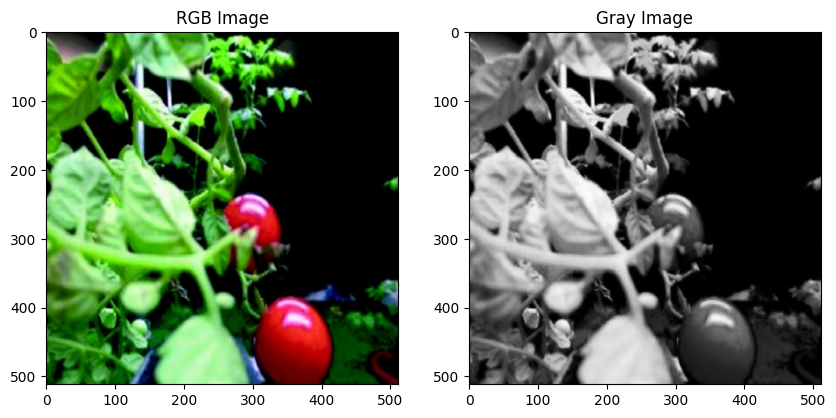

In [ ]:
# Convert the reseized image to RGB
rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Convert the reseized image to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# show the rgb and Gray images image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image, cmap='gray')
plt.title('RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

plt.show()


## Edge Detection

### Laplacian of Gaussian

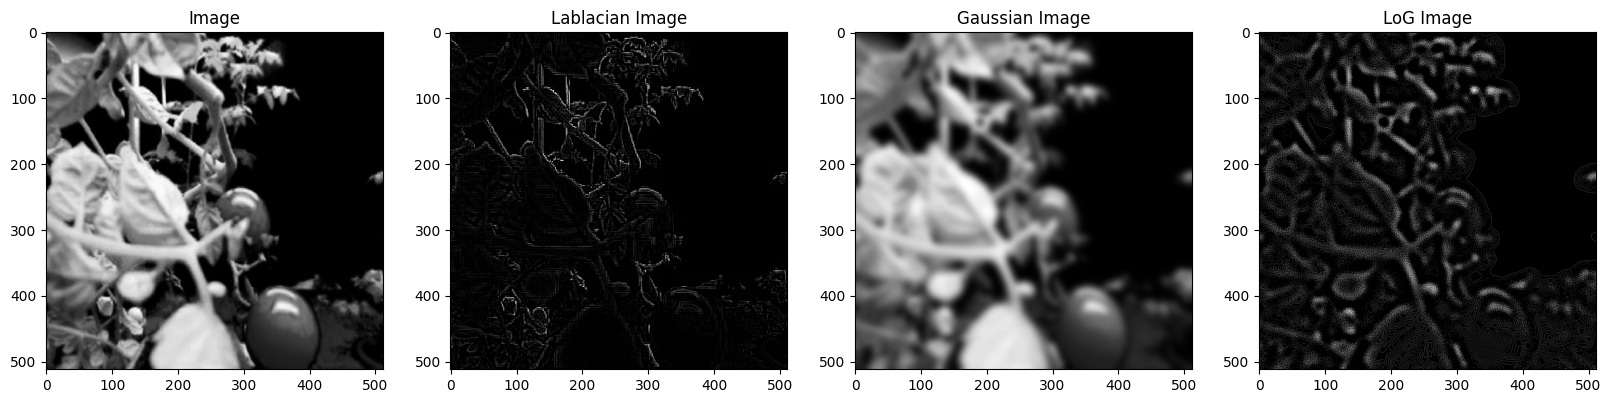

In [ ]:
# Convolve the gray resized image with a Laplacian
lablacian_mask = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])
lablacian = cv2.filter2D(gray_image, -1, lablacian_mask)

# Convolve the gray resized image with a Gaussian of sigma 5
gaussian = cv2.GaussianBlur(gray_image, (31, 31), 5)

# Find the Laplacian of Gaussian
LoG = cv2.filter2D(gaussian, -1, lablacian_mask)

# Show the origional image, the laplacian, the gaussian, and the Laplacian of Gaussian results in one figure
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image')

plt.subplot(1, 4, 2)
plt.imshow(lablacian, cmap='gray')
plt.title('Lablacian Image')

plt.subplot(1, 4, 3)
plt.imshow(gaussian, cmap='gray')
plt.title('Gaussian Image')

plt.subplot(1, 4, 4)
plt.imshow(LoG, cmap='gray')
plt.title('LoG Image')

plt.show()

### Difference of Gaussians

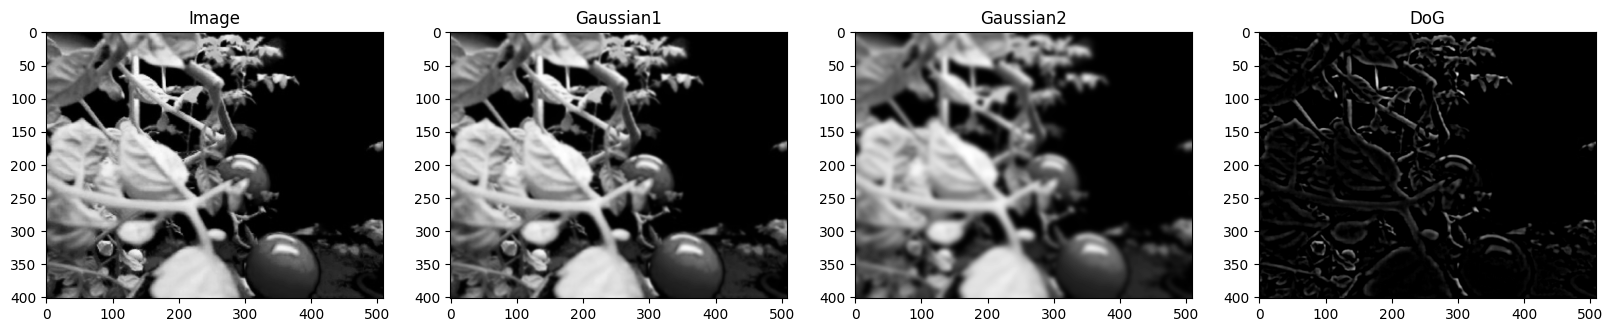

In [ ]:
# Convolve the gray resized image with two gaussians (one with a scale of 1 and another with a scale of 3)
gaussian1 = cv2.GaussianBlur(gray_image, (7, 7), 1)
gaussian2 = cv2.GaussianBlur(gray_image, (19, 19), 3)

# find the difference of gaussians
DoG = cv2.subtract(gaussian1, gaussian2)

# Show the origional image, the two gaussians results, and the DoG results
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image')

plt.subplot(1, 4, 2)
plt.imshow(gaussian1, cmap='gray')
plt.title('Gaussian1')

plt.subplot(1, 4, 3)
plt.imshow(gaussian2, cmap='gray')
plt.title('Gaussian2')

plt.subplot(1, 4, 4)
plt.imshow(DoG, cmap='gray')
plt.title('DoG')

plt.show()

### Canny Edge Detector

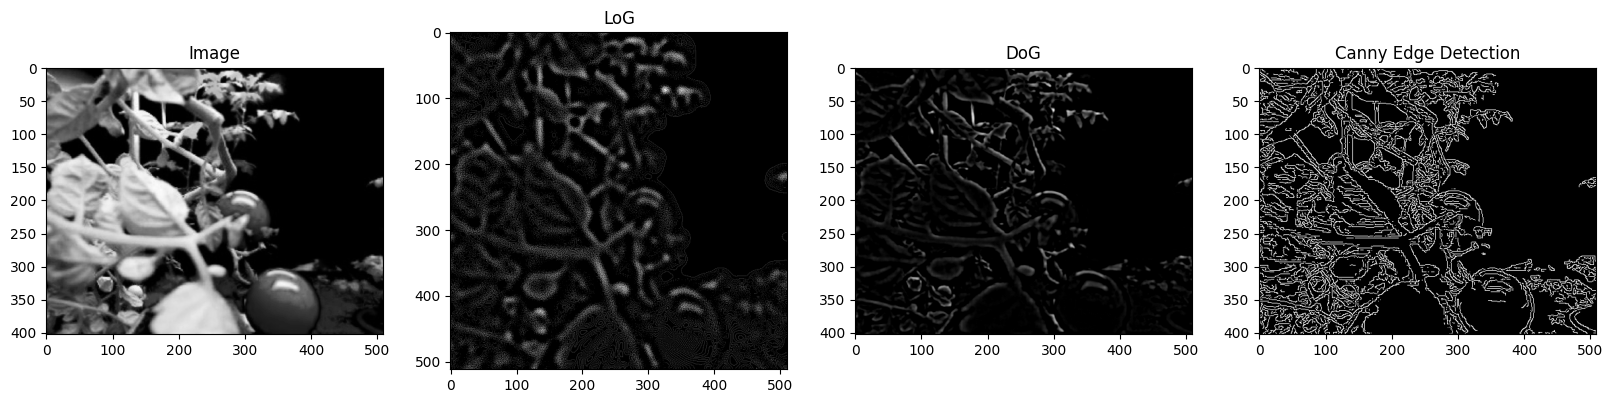

In [ ]:
# Find the median then the two thresholds of the gray resized image, and print the three values
median_value = np.median(gray_image)
lower_threshold = int(max(0, 0.68 * median_value))
upper_threshold = int(min(255, 1.32 * median_value))

# Apply automatic Canny edge detection using the computed thresholds
edges = cv2.Canny(gray_image, lower_threshold, upper_threshold)

# show the origional image, the LoG, the DoG, and the Canny results in one figure
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Image')

plt.subplot(1, 4, 2)
plt.imshow(LoG, cmap='gray')
plt.title('LoG')

plt.subplot(1, 4, 3)
plt.imshow(DoG, cmap='gray')
plt.title('DoG')

plt.subplot(1, 4, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

## Morphological Operations

### Opening or Closing

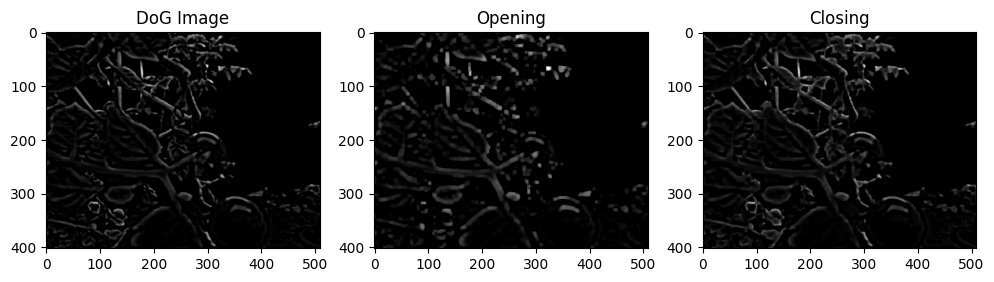

In [ ]:
# Define the lower and upper bounds for the color range
lower = np.array([170, 100, 100], dtype=np.uint8)
upper = np.array([170, 255, 255], dtype=np.uint8)

# Create a mask using inRange
# mask = cv2.inRange(DoG, lower, upper)

# Define the size of the kernel for morphological operations
size = 5
kernel = np.ones((size, size), np.uint8)

# Apply opening and closing operations to enhance the mask
opening = cv2.morphologyEx(DoG, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(DoG, cv2.MORPH_CLOSE, kernel)

# Show the original DoG and the enhanced DoG with opening and closing operations
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(DoG, cmap='gray')
plt.title('DoG Image')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opening')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closing')

plt.show()


### Histogram and Binarization

In [ ]:
# Find the histogram of the gray resized image and plot it
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 255])


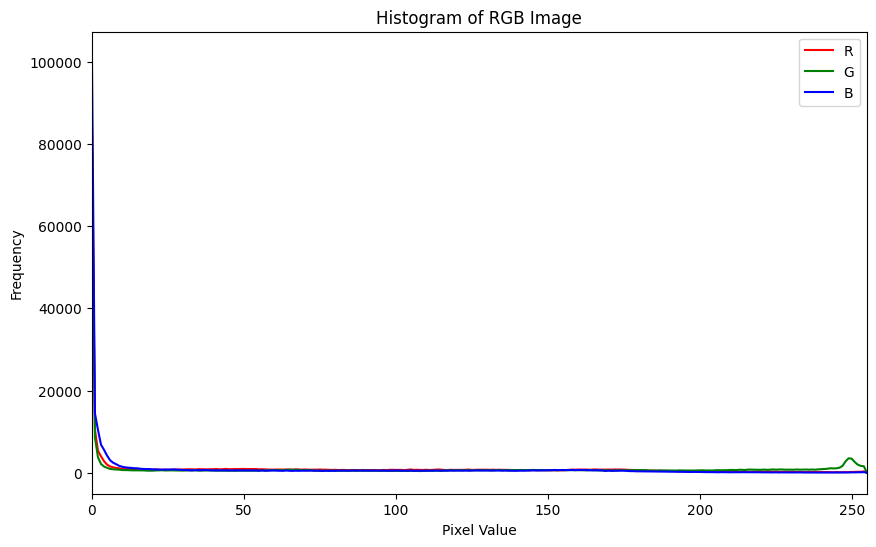

In [ ]:
# Calculate the histogram for each color channel and show them in one plot
colors = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))

for ind, color in enumerate(colors):
    channel_hist = cv2.calcHist([rgb_image], [ind], None, [256], [0, 255])
    plt.plot(channel_hist, color=color, label=f'{colors[ind].capitalize()}')

plt.xlim([0, 255])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of RGB Image')
plt.legend()
plt.show()

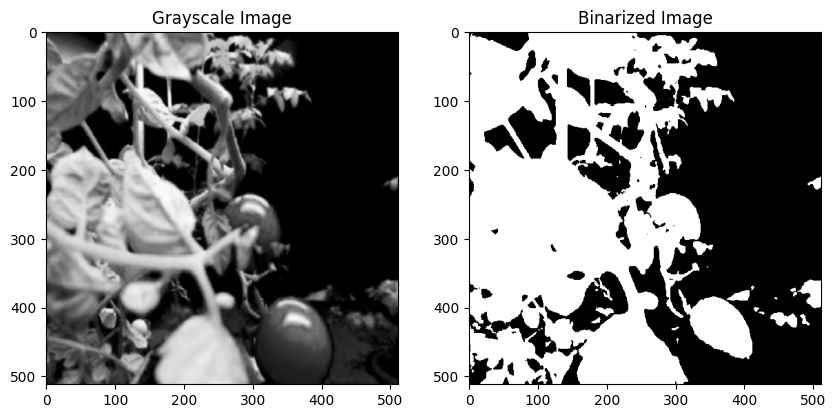

In [ ]:
# Using the peak of the histogram or the median value, binarise the gray scale image and show it

median_value = np.median(gray_image)
threshold_value = int(median_value)

_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarized Image')

plt.show()

## Color Segmentation

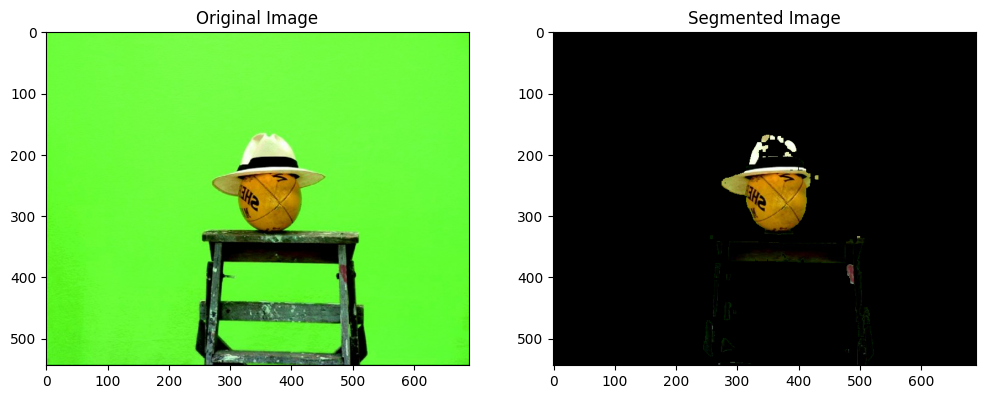

In [ ]:
# Load the image attached to the assignment called "segment"
image = cv2.imread('segment.jpg')

# Convert to suitable color space
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for segmentation, we want to extract the object. Hint: you can extract the green then inverse the mask
lower_color = np.array([35, 50, 50])
upper_color = np.array([90, 255, 255])

# Create a mask with the specified color range
mask = cv2.inRange(image_hsv, lower_color, upper_color)
inverse_mask = cv2.bitwise_not(mask)

# Enhance the mask using morphological operations
kernel = np.ones((5, 5), np.uint8)
enhanced_mask = cv2.morphologyEx(inverse_mask, cv2.MORPH_OPEN, kernel)

# apply the mask on the original RGB image
segmented_image = cv2.bitwise_and(image, image, mask=enhanced_mask)

# Display the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')

plt.show()

## Feature extraction

### Harris

Execution time of Harris corner detection: 0.00936746597290039 seconds


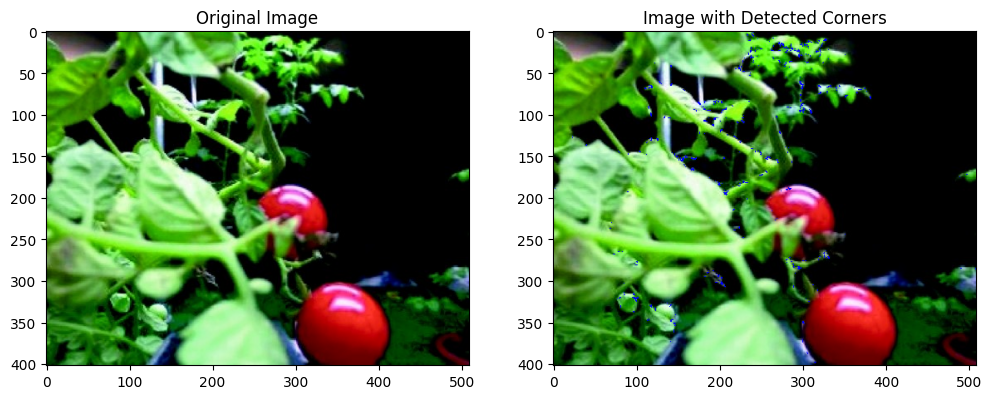

In [ ]:
# Load the image attached to the assignment called "extract"
image = cv2.imread('extract.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# convert it to suitable color space and value type for Harries function
gray_image_float32 = np.float32(gray_image)

# Define parameters for Harris
block_size = 2
ksize = 3
k = 0.04
# Apply Harris corner detection and measure execution time
start_time = time.time()
harris_response = cv2.cornerHarris(gray_image_float32, block_size, ksize, k)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time of Harris corner detection:", execution_time, "seconds")

# filter the number of corners and show them in red on the origional RGB image
threshold = 0.01 * harris_response.max()
corner_image = np.zeros_like(gray_image)
corner_image[harris_response > threshold] = 255

image_with_corners = image.copy()
image_with_corners[corner_image == 255] = [255, 0, 0]

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Corners')

plt.show()

### SIFT

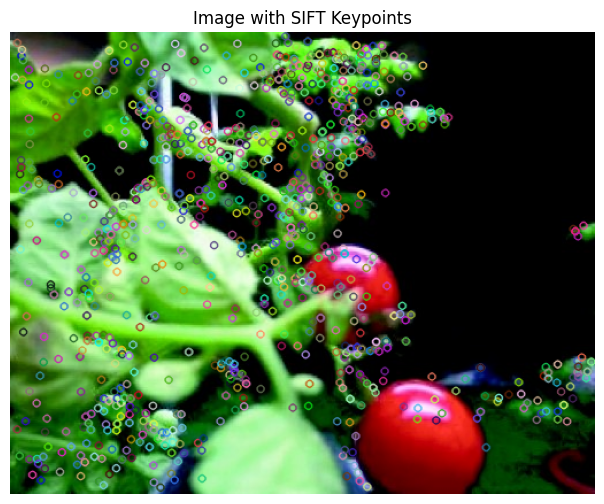

In [ ]:
# convert it to suitable color space and value type for SIFT function
sift = cv2.SIFT_create()

# Apply SIFT function, and print its execution time and number of keypoints
start_time = time.time()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
end_time = time.time()
execution_time = end_time - start_time

# show the keypoints on the origional RGB image

image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.axis('off')
plt.show()

### Fast

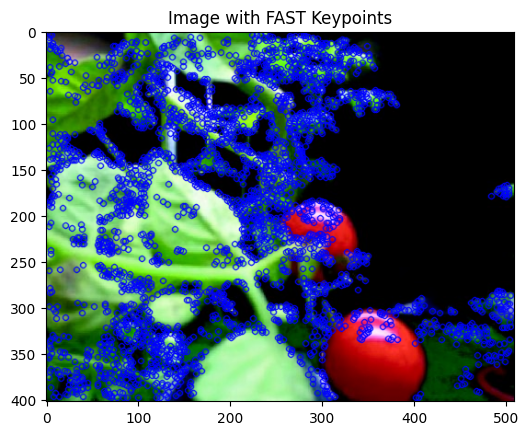

In [ ]:
# convert it to suitable color space and value type for Fast function
fast = cv2.FastFeatureDetector_create()

# Apply Fast function, and print its execution time and number of keypoints
start_time = time.time()
keypoints = fast.detect(gray_image, None)
end_time = time.time()
execution_time = end_time - start_time

# show the keypoints on the origional RGB image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

# Display the image
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with FAST Keypoints')
plt.show()

## What real life problems can you solve using the methods applied in this assignment?

Your Answer Here: